# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [80]:
from citipy import citipy
import pandas as pd
import time, numpy as np, requests as rq
from api_keys import weather_api_key
import matplotlib.pyplot as plt
from datetime import date

## Generate Cities List

In [20]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

654

In [21]:
 #Lists and counters
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list
for index, city in enumerate(cities, start = 1):
    try:
        response = rq.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")



Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : lake elsinore
Processing Record 2 of Set 1 : athabasca
Processing Record 3 of Set 1 : bredasdorp
Processing Record 4 of Set 1 : port alfred
Processing Record 5 of Set 1 : hobart
Processing Record 6 of Set 1 : puerto penasco
Processing Record 7 of Set 1 : roald
Processing Record 8 of Set 1 : rikitea
Processing Record 9 of Set 1 : rundu
Processing Record 10 of Set 1 : flinders
Processing Record 11 of Set 1 : tobane
Processing Record 12 of Set 1 : ribeira grande
Processing Record 13 of Set 1 : mayumba
City not found. Skipping...
Processing Record 14 of Set 1 : laguna
Processing Record 15 of Set 1 : mocuba
Processing Record 16 of Set 1 : ponta do sol
Processing Record 17 of Set 1 : severo-kurilsk
Processing Record 18 of Set 1 : vaini
Processing Record 19 of Set 1 : bluff
Processing Record 20 of Set 1 : atuona
Processing Record 21 of Set 1 : yarmouth
Processing Record 22 of Set 1 : vardo
Processing Reco

Processing Record 39 of Set 4 : hualmay
Processing Record 40 of Set 4 : myitkyina
Processing Record 41 of Set 4 : hami
City not found. Skipping...
Processing Record 42 of Set 4 : northam
Processing Record 43 of Set 4 : isangel
Processing Record 44 of Set 4 : chikwawa
Processing Record 45 of Set 4 : bandarbeyla
Processing Record 46 of Set 4 : kruisfontein
Processing Record 47 of Set 4 : rio gallegos
Processing Record 48 of Set 4 : nelson bay
Processing Record 49 of Set 4 : boffa
Processing Record 50 of Set 4 : hilo
Processing Record 0 of Set 5 : anadyr
Processing Record 1 of Set 5 : wauconda
Processing Record 2 of Set 5 : bethel
Processing Record 3 of Set 5 : syracuse
Processing Record 4 of Set 5 : asau
Processing Record 5 of Set 5 : lasa
Processing Record 6 of Set 5 : gobabis
Processing Record 7 of Set 5 : oliveira dos brejinhos
Processing Record 8 of Set 5 : oistins
Processing Record 9 of Set 5 : gualaquiza
Processing Record 10 of Set 5 : aasiaat
Processing Record 11 of Set 5 : dumas


Processing Record 20 of Set 8 : marienburg
Processing Record 21 of Set 8 : dobeln
Processing Record 22 of Set 8 : epinal
Processing Record 23 of Set 8 : danli
Processing Record 24 of Set 8 : nishihara
Processing Record 25 of Set 8 : batagay
Processing Record 26 of Set 8 : calatayud
Processing Record 27 of Set 8 : elbistan
Processing Record 28 of Set 8 : dubai
Processing Record 29 of Set 8 : banikoara
Processing Record 30 of Set 8 : marsh harbour
Processing Record 31 of Set 8 : tamandare
Processing Record 32 of Set 8 : abu dhabi
Processing Record 33 of Set 8 : husavik
Processing Record 34 of Set 8 : rockingham
Processing Record 35 of Set 8 : shakiso
Processing Record 36 of Set 8 : baherden
Processing Record 37 of Set 8 : bousse
Processing Record 38 of Set 8 : cabo san lucas
Processing Record 39 of Set 8 : ellisras
Processing Record 40 of Set 8 : bardiyah
Processing Record 41 of Set 8 : sal rei
City not found. Skipping...
Processing Record 42 of Set 8 : bubaque
Processing Record 43 of Se

Processing Record 7 of Set 12 : olinda
Processing Record 8 of Set 12 : tema
Processing Record 9 of Set 12 : tororo
Processing Record 10 of Set 12 : tabing
Processing Record 11 of Set 12 : lesnoye
Processing Record 12 of Set 12 : port pirie
Processing Record 13 of Set 12 : pokhara
Processing Record 14 of Set 12 : mayaky
Processing Record 15 of Set 12 : port-gentil
Processing Record 16 of Set 12 : kiruna
Processing Record 17 of Set 12 : alugan
Processing Record 18 of Set 12 : jurm
Processing Record 19 of Set 12 : pochutla
Processing Record 20 of Set 12 : elko
Processing Record 21 of Set 12 : ambon
Processing Record 22 of Set 12 : quelimane
Processing Record 23 of Set 12 : areosa
Processing Record 24 of Set 12 : wewak
Processing Record 25 of Set 12 : morgantown
Processing Record 26 of Set 12 : mobaye
City not found. Skipping...
Processing Record 27 of Set 12 : lugo
Processing Record 28 of Set 12 : belaya gora
Processing Record 29 of Set 12 : turbat
Processing Record 30 of Set 12 : maniits

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
len("date_list")

9

In [74]:
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
"Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list  })
weather_data

weather_data_humidity_lesthan_100 = weather_data
weather_data["Humidity"] = weather_data["Humidity"].map("{:d}".format)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Lake Elsinore,33.6681,-117.3273,90.59,53,4,5.77,US,1629664838
1,Athabasca,54.7169,-113.2854,56.23,78,100,3.53,CA,1629664838
2,Bredasdorp,-34.5322,20.0403,47.52,87,0,3.44,ZA,1629664254
3,Port Alfred,-33.5906,26.8910,57.09,76,0,5.86,ZA,1629664255
4,Hobart,-42.8794,147.3294,50.11,81,75,1.99,AU,1629664242
...,...,...,...,...,...,...,...,...,...
599,Jinchang,38.4953,102.1739,62.67,32,68,6.33,CN,1629665011
600,São Miguel do Araguaia,-13.2750,-50.1628,89.46,21,0,6.11,BR,1629665012
601,Albacete,38.8333,-2.0000,83.19,26,0,6.91,ES,1629665012
602,Patiya,22.2931,91.9762,75.67,96,100,4.52,BD,1629665013


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [75]:
weather_data['Humidity'] = pd.to_numeric(weather_data['Humidity'])

weather_data.to_csv("output_data/cities.csv")

In [76]:
#  Get the indices of cities that have humidity over 100%.

index_humidity_greater_thn_100 = weather_data[ weather_data['Humidity'] > 100 ].index



,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Lake Elsinore,33.6681,-117.3273,90.59,53,4,5.77,US,1629664838
1,Athabasca,54.7169,-113.2854,56.23,78,100,3.53,CA,1629664838
2,Bredasdorp,-34.5322,20.0403,47.52,87,0,3.44,ZA,1629664254
3,Port Alfred,-33.5906,26.8910,57.09,76,0,5.86,ZA,1629664255
4,Hobart,-42.8794,147.3294,50.11,81,75,1.99,AU,1629664242
...,...,...,...,...,...,...,...,...,...
599,Jinchang,38.4953,102.1739,62.67,32,68,6.33,CN,1629665011
600,São Miguel do Araguaia,-13.2750,-50.1628,89.46,21,0,6.11,BR,1629665012
601,Albacete,38.8333,-2.0000,83.19,26,0,6.91,ES,1629665012
602,Patiya,22.2931,91.9762,75.67,96,100,4.52,BD,1629665013


In [78]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# So far did not see a city with more than 100 % humidity. This code is in place just in case.
weather_data.drop(index_humidity_greater_thn_100, inplace = True)

weather_data.to_csv("output_data/cities_clean.csv")
weather_data


,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Lake Elsinore,33.6681,-117.3273,90.59,53,4,5.77,US,1629664838
1,Athabasca,54.7169,-113.2854,56.23,78,100,3.53,CA,1629664838
2,Bredasdorp,-34.5322,20.0403,47.52,87,0,3.44,ZA,1629664254
3,Port Alfred,-33.5906,26.8910,57.09,76,0,5.86,ZA,1629664255
4,Hobart,-42.8794,147.3294,50.11,81,75,1.99,AU,1629664242
...,...,...,...,...,...,...,...,...,...
599,Jinchang,38.4953,102.1739,62.67,32,68,6.33,CN,1629665011
600,São Miguel do Araguaia,-13.2750,-50.1628,89.46,21,0,6.11,BR,1629665012
601,Albacete,38.8333,-2.0000,83.19,26,0,6.91,ES,1629665012
602,Patiya,22.2931,91.9762,75.67,96,100,4.52,BD,1629665013


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

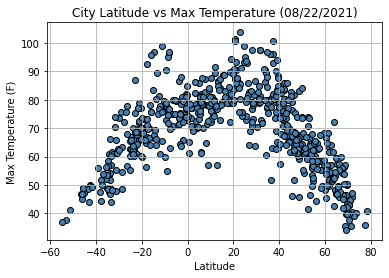

In [100]:

today = date.today()

# dd/mm/YY
d1 = today.strftime("%m/%d/%Y")
#print("d1 =", d1)

plt.title(f"City Latitude vs Max Temperature ({d1})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "steelblue", edgecolor = "black")
plt.grid()
fileLocation = f"Images/City Latitude vs Max Temperature.png"
plt.savefig(fileLocation)

## Latitude vs. Humidity Plot

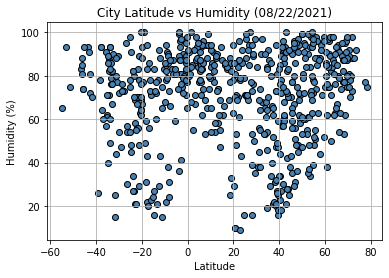

In [103]:

plt.title(f"City Latitude vs Humidity ({d1})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")
plt.grid()

plt.savefig(f"Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

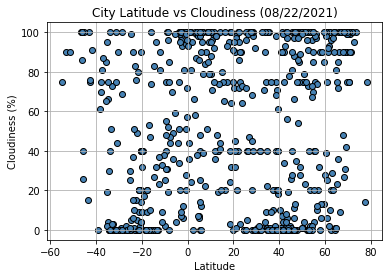

In [105]:
plt.title(f"City Latitude vs Cloudiness ({d1})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "steelblue", edgecolor = "black")
plt.grid()

plt.savefig(f"Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

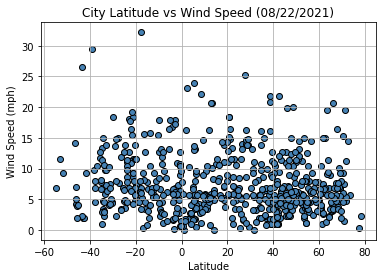

In [106]:
plt.title(f"City Latitude vs Wind Speed ({d1})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")
plt.grid()

plt.savefig(f"Images/City Latitude vs Wind Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


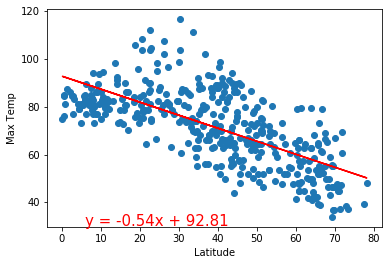

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


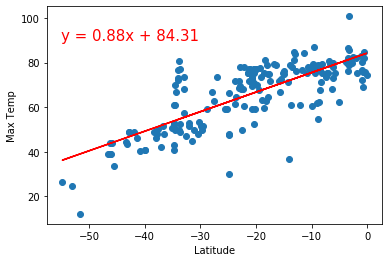

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


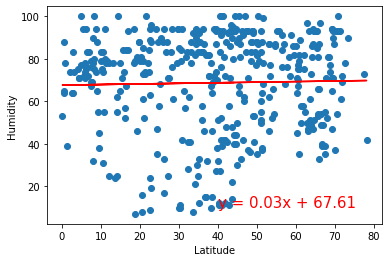

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


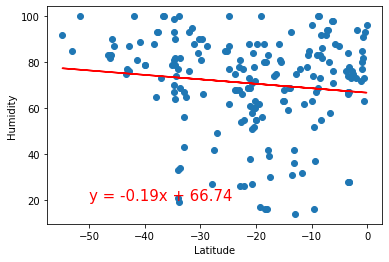

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


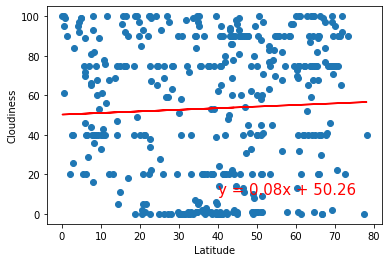

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


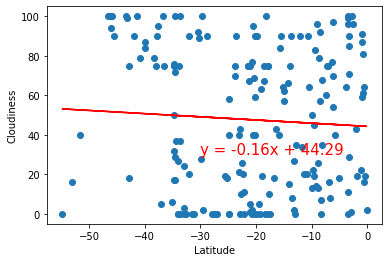

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


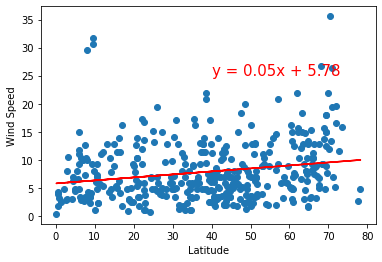

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


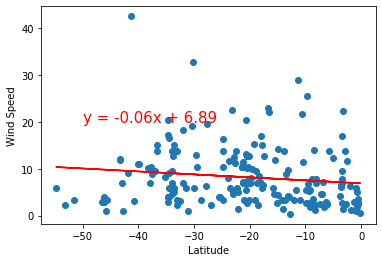